In [7]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [12]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
print(iskaggle)
if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

Interactive


In [30]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [31]:
urls = search_images('dolphin photos', max_images=1)
urls[0]

Searching for 'dolphin photos'


'https://bluwaveboatrental.com/wp-content/uploads/2017/09/dolphin-jumping.jpg'

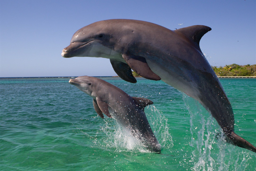

In [32]:
from fastdownload import download_url
dest = 'dolphin.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos'


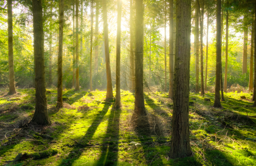

In [33]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [34]:
searches = 'forest','dolphin'
path = Path('dolphin_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'dolphin photo'
Searching for 'dolphin sun photo'
Searching for 'dolphin shade photo'


In [40]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

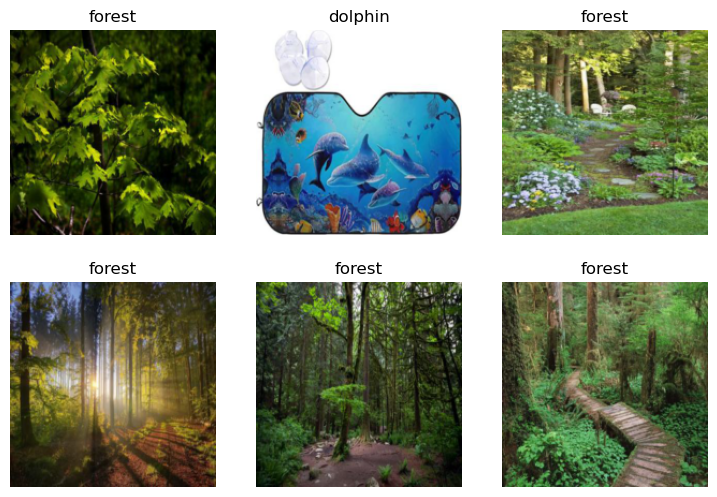

In [41]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [42]:
learn = vision_learner(dls, resnet18, metrics=error_rate)


In [43]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.818175,1.893863,0.441176,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.053998,0.090636,0.029412,00:25
1,0.028854,0.003292,0.000000,00:25
2,0.019195,0.001033,0.000000,00:25


Searching for 'shark'


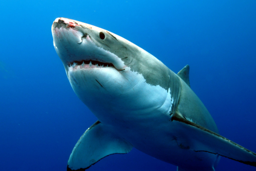

In [56]:
urls = search_images('shark', max_images=1)
urls[0]
from fastdownload import download_url
dest = 'dolphin.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)



In [57]:
is_dolphin,_,probs = learn.predict(PILImage.create('dolphin.jpg'))
print(f"This is a: {is_dolphin}.")
print(f"Probability it's a dolphin: {probs[0]:.4f}")

This is a: dolphin.
Probability it's a dolphin: 1.0000
